In [1]:

import pandas_datareader as pdr
key=""

In [2]:
import pandas as pd

In [3]:
df=pd.read_csv('ICICI.csv')

In [4]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,1996-01-01,3.030,3.030,2.925,2.980,0.595425,350000.0
1,1996-01-02,2.980,3.025,2.950,2.975,0.594426,412000.0
2,1996-01-03,2.975,2.995,2.950,2.985,0.596424,284000.0
3,1996-01-04,2.985,2.980,2.940,2.965,0.592428,282000.0
4,1996-01-05,2.965,2.980,2.950,2.960,0.591429,189000.0


In [5]:
df.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
6033,2020-06-10,990.0,999.849976,978.200012,991.849976,991.849976,18248865.0
6034,2020-06-11,985.0,988.400024,965.000000,968.599976,968.599976,15448857.0
6035,2020-06-12,928.0,986.650024,928.000000,982.750000,982.750000,21322438.0
6036,2020-06-15,968.0,974.000000,943.000000,949.849976,949.849976,16004968.0
6037,2020-06-16,975.0,993.950012,952.000000,990.400024,990.400024,22699985.0


In [6]:
df1=df.reset_index()['Close']

In [7]:
df1

0         2.980000
1         2.975000
2         2.985000
3         2.965000
4         2.960000
           ...    
6033    991.849976
6034    968.599976
6035    982.750000
6036    949.849976
6037    990.400024
Name: Close, Length: 6038, dtype: float64

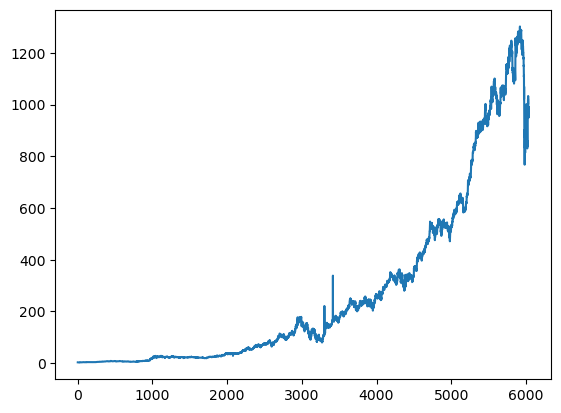

In [8]:
import matplotlib.pyplot as plt
plt.plot(df1)

In [9]:
import numpy as np

In [10]:
df1

0         2.980000
1         2.975000
2         2.985000
3         2.965000
4         2.960000
           ...    
6033    991.849976
6034    968.599976
6035    982.750000
6036    949.849976
6037    990.400024
Name: Close, Length: 6038, dtype: float64

In [11]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

In [12]:
print(df1)

[[4.19242049e-04]
 [4.15395791e-04]
 [4.23088306e-04]
 ...
 [7.54108751e-01]
 [7.28800359e-01]
 [7.59993543e-01]]


In [13]:

training_size=int(len(df1)*0.65)
test_size=len(df1)-training_size
train_data,test_data=df1[0:training_size,:],df1[training_size:len(df1),:1]

In [19]:
training_size,test_size

(3924, 2114)

In [20]:
train_data

array([[0.00041924],
       [0.0004154 ],
       [0.00042309],
       ...,
       [0.18393957],
       [0.18345878],
       [0.1839011 ]])

In [14]:
import numpy

def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3-----99   100 
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return numpy.array(dataX), numpy.array(dataY)

In [15]:

time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [16]:
print(X_train.shape), print(y_train.shape)

(3823, 100)
(3823,)


(None, None)

In [17]:
print(X_test.shape), print(ytest.shape)

(2013, 100)
(2013,)


(None, None)

In [18]:

X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [19]:

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [20]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')


In [21]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 lstm_1 (LSTM)               (None, 100, 50)           20200     
                                                                 
 lstm_2 (LSTM)               (None, 50)                20200     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [22]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 lstm_1 (LSTM)               (None, 100, 50)           20200     
                                                                 
 lstm_2 (LSTM)               (None, 50)                20200     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [23]:
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
60/60 [==============================] - 13s 135ms/step - loss: 4.6617e-04 - val_loss: 0.0014
Epoch 2/100
60/60 [==============================] - 7s 120ms/step - loss: 2.7870e-05 - val_loss: 0.0047
Epoch 3/100
60/60 [==============================] - 7s 118ms/step - loss: 2.5616e-05 - val_loss: 0.0044
Epoch 4/100
60/60 [==============================] - 7s 112ms/step - loss: 2.6091e-05 - val_loss: 0.0044
Epoch 5/100
60/60 [==============================] - 7s 117ms/step - loss: 2.6132e-05 - val_loss: 0.0049
Epoch 6/100
60/60 [==============================] - 7s 110ms/step - loss: 2.4961e-05 - val_loss: 0.0051
Epoch 7/100
60/60 [==============================] - 7s 113ms/step - loss: 2.5389e-05 - val_loss: 0.0046
Epoch 8/100
60/60 [==============================] - 7s 110ms/step - loss: 2.3978e-05 - val_loss: 0.0048
Epoch 9/100
60/60 [==============================] - 7s 111ms/step - loss: 2.4071e-05 - val_loss: 0.0059
Epoch 10/100
60/60 [==============================] - 

Epoch 78/100
60/60 [==============================] - 7s 113ms/step - loss: 1.4219e-05 - val_loss: 0.0017
Epoch 79/100
60/60 [==============================] - 7s 110ms/step - loss: 1.3184e-05 - val_loss: 5.9620e-04
Epoch 80/100
60/60 [==============================] - 7s 117ms/step - loss: 1.4107e-05 - val_loss: 0.0010
Epoch 81/100
60/60 [==============================] - 7s 112ms/step - loss: 1.3093e-05 - val_loss: 5.3304e-04
Epoch 82/100
60/60 [==============================] - 7s 117ms/step - loss: 1.7031e-05 - val_loss: 0.0019
Epoch 83/100
60/60 [==============================] - 7s 112ms/step - loss: 1.4253e-05 - val_loss: 0.0017
Epoch 84/100
60/60 [==============================] - 7s 113ms/step - loss: 1.3717e-05 - val_loss: 0.0018
Epoch 85/100
60/60 [==============================] - 7s 113ms/step - loss: 1.3988e-05 - val_loss: 0.0015
Epoch 86/100
60/60 [==============================] - 7s 112ms/step - loss: 1.3023e-05 - val_loss: 0.0015
Epoch 87/100
60/60 [==================

In [27]:
import tensorflow as tf

In [28]:
tf.__version__

'2.10.0'

In [30]:

train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

63/63 [==============================] - 1s 21ms/step


In [31]:

train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [32]:

import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

102.1357765187888

In [33]:

math.sqrt(mean_squared_error(ytest,test_predict))

703.6137692158983

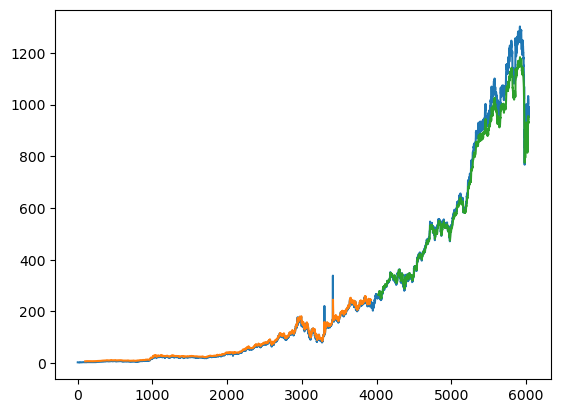

In [34]:
 

look_back=100
trainPredictPlot = numpy.empty_like(df1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict

testPredictPlot = numpy.empty_like(df1)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1, :] = test_predict

plt.plot(scaler.inverse_transform(df1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [35]:
len(test_data)

2114

In [36]:
x_input=test_data[1993:].reshape(1,-1)
x_input.shape


(1, 121)

In [37]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

In [38]:
temp_input

[0.9922689858461914,
 0.9895381992985065,
 0.9956152104904631,
 1.0,
 0.9898074180801959,
 0.9754223595172664,
 0.9789224913792757,
 0.9844226578206768,
 0.9766916436668682,
 0.9816917781935646,
 0.9879611961006113,
 0.97384545016805,
 0.9527294412807217,
 0.967845251811944,
 0.9653067781306706,
 0.9761532045649868,
 0.9848456899714249,
 0.9873842575013771,
 0.9900766376311366,
 0.9860380674364974,
 0.9886535408817275,
 0.9813456519580944,
 0.9634605553818346,
 0.9553449154952032,
 0.9526525353654437,
 0.955729541228026,
 0.9554988219436893,
 0.9313827131090566,
 0.9390752277655124,
 0.9488062780372157,
 0.9412676698292459,
 0.9414599826956573,
 0.9156900585965302,
 0.9441523628254169,
 0.9555757278589673,
 0.9518448774818727,
 0.9536910056127786,
 0.9522295032146956,
 0.9524602224990323,
 0.9589219532724904,
 0.9530756605956191,
 0.9361136288540636,
 0.9344213125537136,
 0.9314212133756606,
 0.9421522336280949,
 0.934382813056361,
 0.9288826458457085,
 0.9214594445888721,
 0.920651692

In [39]:

from numpy import array

lst_output=[]
n_steps=120
i=0
while(i<30):
    
    if(len(temp_input)>100):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1
    

print(lst_output)

0 day input [0.9895382  0.99561521 1.         0.98980742 0.97542236 0.97892249
 0.98442266 0.97669164 0.98169178 0.9879612  0.97384545 0.95272944
 0.96784525 0.96530678 0.9761532  0.98484569 0.98738426 0.99007664
 0.98603807 0.98865354 0.98134565 0.96346056 0.95534492 0.95265254
 0.95572954 0.95549882 0.93138271 0.93907523 0.94880628 0.94126767
 0.94145998 0.91569006 0.94415236 0.95557573 0.95184488 0.95369101
 0.9522295  0.95246022 0.95892195 0.95307566 0.93611363 0.93442131
 0.93142121 0.94215223 0.93438281 0.92888265 0.92145944 0.92065169
 0.92080551 0.90403588 0.90553588 0.90722829 0.8818814  0.88380453
 0.87115038 0.84991906 0.85491919 0.78376339 0.82107213 0.76699371
 0.74822396 0.6726835  0.68703001 0.67726051 0.59164283 0.58868123
 0.65718307 0.69129935 0.69387637 0.63787487 0.66114473 0.63633637
 0.62418216 0.68745309 0.68191452 0.70972293 0.68687615 0.66222165
 0.67487585 0.69837647 0.7249541  0.7071075  0.71245377 0.73272357
 0.7197232  0.71329997 0.71460771 0.74976246 0.768

8 day output [[0.61149895]]
9 day input [0.9879612  0.97384545 0.95272944 0.96784525 0.96530678 0.9761532
 0.98484569 0.98738426 0.99007664 0.98603807 0.98865354 0.98134565
 0.96346056 0.95534492 0.95265254 0.95572954 0.95549882 0.93138271
 0.93907523 0.94880628 0.94126767 0.94145998 0.91569006 0.94415236
 0.95557573 0.95184488 0.95369101 0.9522295  0.95246022 0.95892195
 0.95307566 0.93611363 0.93442131 0.93142121 0.94215223 0.93438281
 0.92888265 0.92145944 0.92065169 0.92080551 0.90403588 0.90553588
 0.90722829 0.8818814  0.88380453 0.87115038 0.84991906 0.85491919
 0.78376339 0.82107213 0.76699371 0.74822396 0.6726835  0.68703001
 0.67726051 0.59164283 0.58868123 0.65718307 0.69129935 0.69387637
 0.63787487 0.66114473 0.63633637 0.62418216 0.68745309 0.68191452
 0.70972293 0.68687615 0.66222165 0.67487585 0.69837647 0.7249541
 0.7071075  0.71245377 0.73272357 0.7197232  0.71329997 0.71460771
 0.74976246 0.76876298 0.70814598 0.69926113 0.72614648 0.70968448
 0.71279994 0.70260736 0

16 day output [[0.5489575]]
17 day input [0.99007664 0.98603807 0.98865354 0.98134565 0.96346056 0.95534492
 0.95265254 0.95572954 0.95549882 0.93138271 0.93907523 0.94880628
 0.94126767 0.94145998 0.91569006 0.94415236 0.95557573 0.95184488
 0.95369101 0.9522295  0.95246022 0.95892195 0.95307566 0.93611363
 0.93442131 0.93142121 0.94215223 0.93438281 0.92888265 0.92145944
 0.92065169 0.92080551 0.90403588 0.90553588 0.90722829 0.8818814
 0.88380453 0.87115038 0.84991906 0.85491919 0.78376339 0.82107213
 0.76699371 0.74822396 0.6726835  0.68703001 0.67726051 0.59164283
 0.58868123 0.65718307 0.69129935 0.69387637 0.63787487 0.66114473
 0.63633637 0.62418216 0.68745309 0.68191452 0.70972293 0.68687615
 0.66222165 0.67487585 0.69837647 0.7249541  0.7071075  0.71245377
 0.73272357 0.7197232  0.71329997 0.71460771 0.74976246 0.76876298
 0.70814598 0.69926113 0.72614648 0.70968448 0.71279994 0.70260736
 0.69164552 0.71172301 0.68560692 0.68133758 0.64172113 0.63710562
 0.65745229 0.65933696

24 day output [[0.50507796]]
25 day input [0.95549882 0.93138271 0.93907523 0.94880628 0.94126767 0.94145998
 0.91569006 0.94415236 0.95557573 0.95184488 0.95369101 0.9522295
 0.95246022 0.95892195 0.95307566 0.93611363 0.93442131 0.93142121
 0.94215223 0.93438281 0.92888265 0.92145944 0.92065169 0.92080551
 0.90403588 0.90553588 0.90722829 0.8818814  0.88380453 0.87115038
 0.84991906 0.85491919 0.78376339 0.82107213 0.76699371 0.74822396
 0.6726835  0.68703001 0.67726051 0.59164283 0.58868123 0.65718307
 0.69129935 0.69387637 0.63787487 0.66114473 0.63633637 0.62418216
 0.68745309 0.68191452 0.70972293 0.68687615 0.66222165 0.67487585
 0.69837647 0.7249541  0.7071075  0.71245377 0.73272357 0.7197232
 0.71329997 0.71460771 0.74976246 0.76876298 0.70814598 0.69926113
 0.72614648 0.70968448 0.71279994 0.70260736 0.69164552 0.71172301
 0.68560692 0.68133758 0.64172113 0.63710562 0.65745229 0.65933696
 0.64341345 0.65383684 0.69326098 0.72526182 0.73018505 0.7578781
 0.76814759 0.78449418 

In [40]:
day_new=np.arange(1,121)
day_pred=np.arange(121,151)

In [41]:
import matplotlib.pyplot as plt

In [42]:
len(df1)

6038

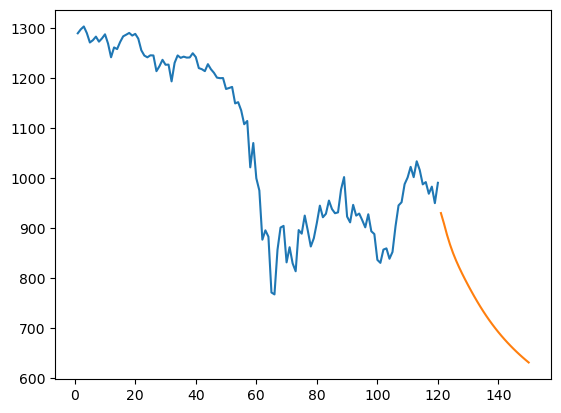

In [43]:
plt.plot(day_new,scaler.inverse_transform(df1[5918:]))
plt.plot(day_pred,scaler.inverse_transform(lst_output))

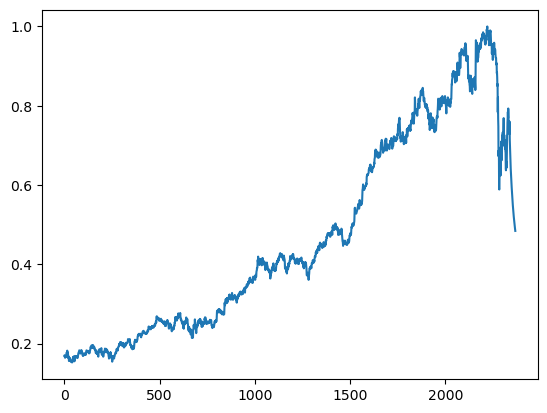

In [44]:
df3=df1.tolist()
df3.extend(lst_output)
plt.plot(df3[3700:])


In [45]:
df3=scaler.inverse_transform(df3).tolist()

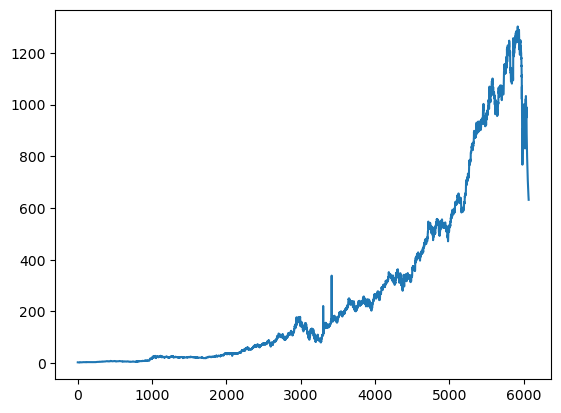

In [46]:
plt.plot(df3)